In [1]:
import pandas as pd
import json 
import matplotlib
import calplot


In [2]:
with open('Journal.json',encoding='utf8') as file:
    diaryData = json.load(file)
    
df = pd.DataFrame(diaryData["entries"])
df =df.drop(columns=['text', 'creationOSVersion', 'richText','photos'])

In [ ]:
# Convert creationDate to datetime and set as index
#df["creationDate"] = pd.to_datetime(df["creationDate"])
#df.set_index("creationDate", inplace=True)

In [3]:
#df[:3]
#df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460 entries, 0 to 3459
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tags                 1315 non-null   object 
 1   creationDevice       2357 non-null   object 
 2   duration             3458 non-null   float64
 3   creationOSName       2296 non-null   object 
 4   isPinned             3460 non-null   bool   
 5   timeZone             3460 non-null   object 
 6   modifiedDate         3460 non-null   object 
 7   creationDeviceType   2296 non-null   object 
 8   uuid                 3460 non-null   object 
 9   starred              3460 non-null   bool   
 10  isAllDay             3460 non-null   bool   
 11  creationDeviceModel  2296 non-null   object 
 12  creationDate         3460 non-null   object 
 13  editingTime          2285 non-null   float64
 14  location             2747 non-null   object 
 15  weather              2463 non-null   o

In [ ]:
#df.sort_index()
#daily_counts = df['creationDate'].dt.date.value_counts().sort_index()
# for an index daily_counts = df.index.to_series().dt.date.value_counts().sort_index()
# comprehension listzeros = [1 for _ in range(len(df))]



In [4]:
journal_dates = df[['creationDate']]

#print (type(journal_count['creationDate'][0]))
journal_dates['creationDate'] = pd.to_datetime(journal_dates['creationDate'])
#print (type(journal_count['creationDate'][0]))


/var/folders/bh/3z0s10hd1wg28h1kqr632vfr0000gn/T/ipykernel_26681/2657108693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  journal_dates['creationDate'] = pd.to_datetime(journal_dates['creationDate'])


In [5]:

# Group by day and count entries
daily_counts = journal_dates['creationDate'].dt.date.value_counts().sort_index()

# Convert to a Pandas Series
#result_series = pd.Series(daily_counts, index=daily_counts.index)

#print(result_series)


In [6]:
print(type(journal_dates))
print(daily_counts.values)
print(type(daily_counts.index))

<class 'pandas.core.frame.DataFrame'>
[1 1 1 ... 1 1 1]
<class 'pandas.core.indexes.base.Index'>


In [7]:
# Create a Pandas Series with the Timestamps as the index
daily_counts = pd.Series(daily_counts.values, index=pd.DatetimeIndex(daily_counts.index))

In [8]:
type(daily_counts)

pandas.core.series.Series

In [9]:
#dummy = pd.Series([0,0],index=['2002-01-01','2003-01-01'])
daily_counts[pd.Timestamp("2015-01-01")] = -1


#s.drop(labels=['B', 'C'])

# s1 = pd.Series([1, 2, 3])
# >>> s2 = pd.Series([4, 5, 6])
# >>> s3 = pd.Series([4, 5, 6], index=['2002-01-01','2003-01-01',5])
# >>> s1.append(s2)

In [10]:
#df = df[df.index >= cutoff_date]
daily_counts = daily_counts[daily_counts.index > '2014-12-31']

In [11]:
print(daily_counts[100:])

creationDate
2015-08-31    1
2015-09-02    1
2015-09-05    1
2015-09-06    1
2015-09-08    1
             ..
2024-12-13    1
2024-12-18    1
2024-12-20    1
2024-12-21    1
2015-01-01   -1
Length: 2228, dtype: int64


(<Figure size 1250x1700 with 11 Axes>,
 array([<Axes: ylabel='2015'>, <Axes: ylabel='2016'>,
        <Axes: ylabel='2017'>, <Axes: ylabel='2018'>,
        <Axes: ylabel='2019'>, <Axes: ylabel='2020'>,
        <Axes: ylabel='2021'>, <Axes: ylabel='2022'>,
        <Axes: ylabel='2023'>, <Axes: ylabel='2024'>], dtype=object))

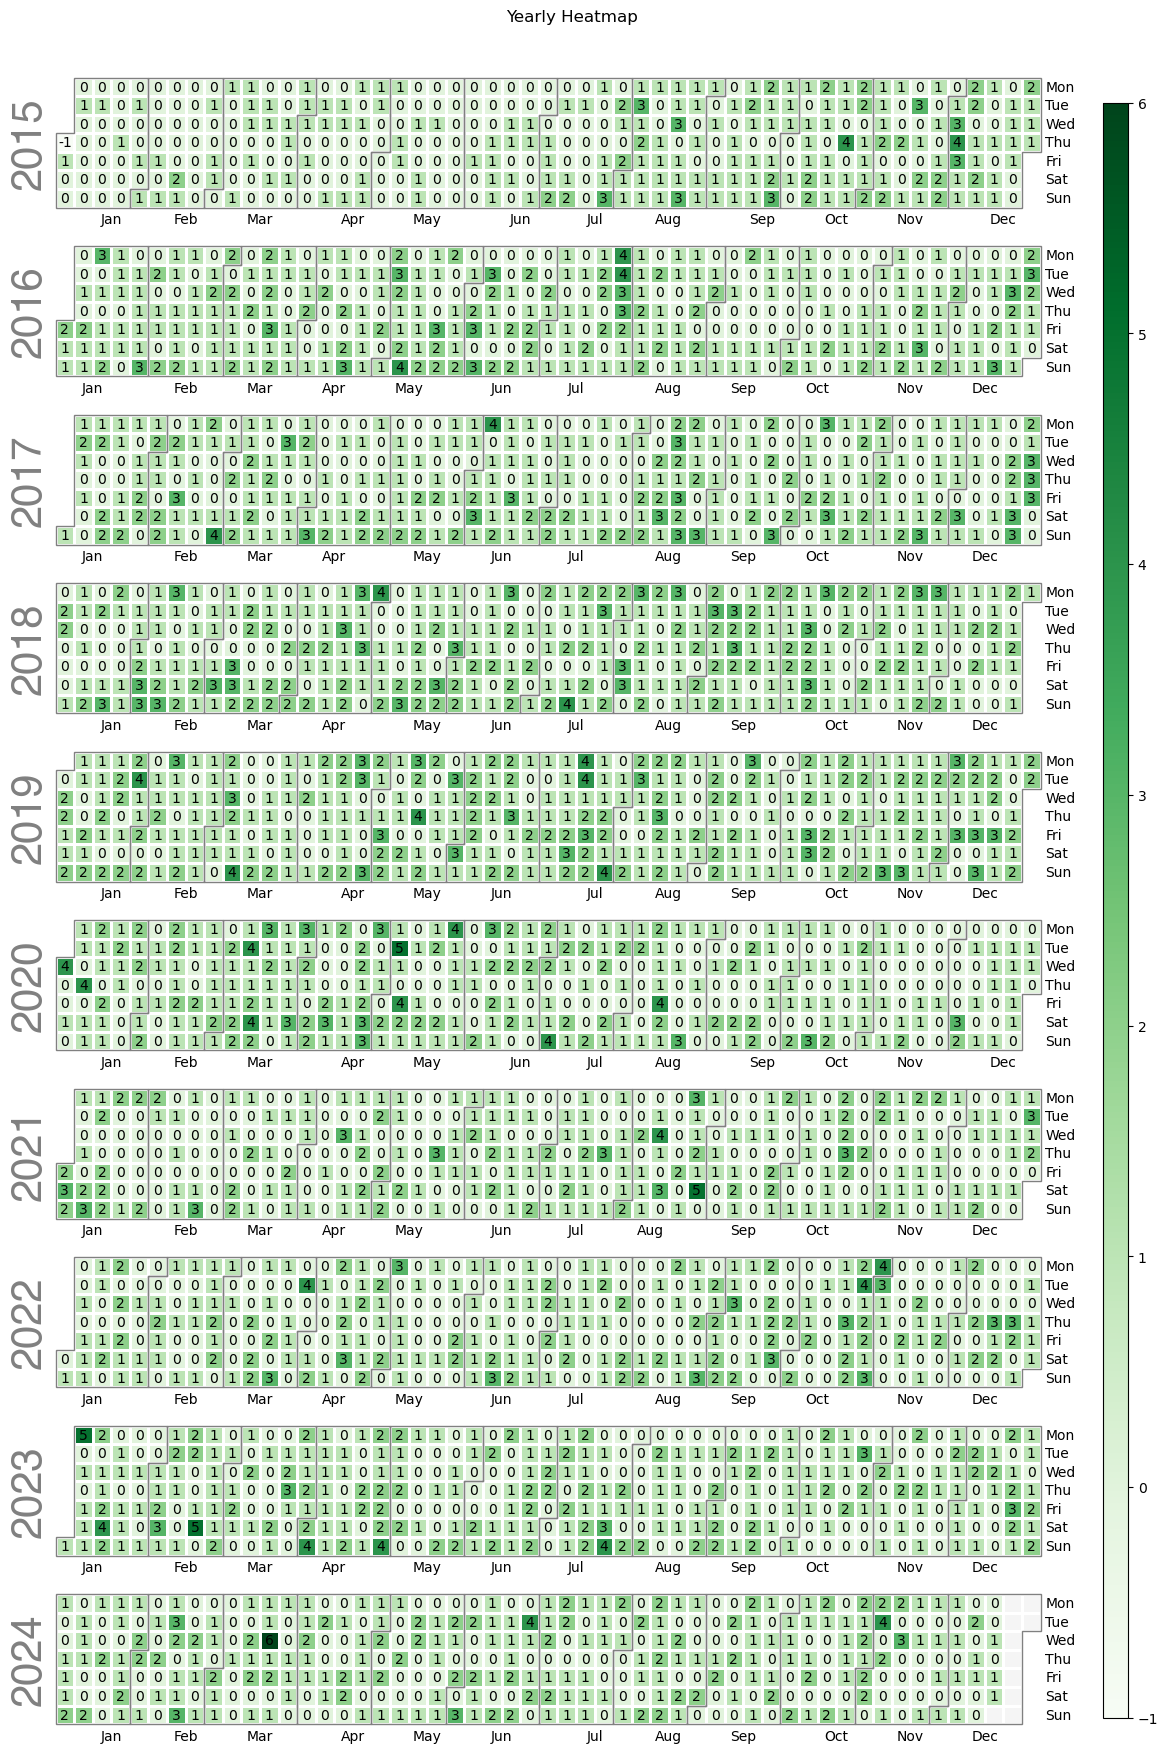

In [12]:
calplot.calplot(daily_counts, textformat='{:.0f}',textfiller=' ', cmap='Greens', colorbar=True, suptitle="Yearly Heatmap")

In [ ]:
pd.__version__